In [1]:
import csv
import numpy as np
import copy
with open("prem.csv",'r',encoding="utf8") as file:
    data = list(csv.reader(file,delimiter=","))
    leaguedata = np.array(data)
with open("matches.csv", 'r',encoding="utf8") as file:
      #  reader = csv.reader(file)
    sample_data = list(csv.reader(file, delimiter=","))
    matchdata = np.array(sample_data)
matrixm =  [ [] for _ in range(len(leaguedata)+1) ]
matrixm[0].append(0)
features = [0,1,5,6]
listi = [ [] for _ in range(len(leaguedata)-1) ]
dicti = {}
vindex = 0
names = []
for a in range(len(leaguedata)-1):
    for b in features:
        listi[a].append(leaguedata[a+1][b])
        if b == 1:
            matrixm[0].append(leaguedata[a+1][b])
            matrixm[a+1].append(leaguedata[a+1][b])
            dicti.update({leaguedata[a+1][b]:int(leaguedata[a+1][b-1])})
            names.append(leaguedata[a+1][b])
for z in range(len(leaguedata)):
    for t in range(len(leaguedata)-1):
        matrixm[z+1].append(0)
#print(dicti)
for b in matchdata[1:]:
    home = b[4]
    away = b[8]
    try:
        if b[6][0] > b[6][-1]:
            matrixm[dicti[away]][dicti[home]] += 1
        if b[6][0] < b[6][-1]:
            matrixm[dicti[home]][dicti[away]] += 1
        if b[6][0] == b[6][-1]:
            matrixm[dicti[home]][dicti[away]] += .5
            matrixm[dicti[away]][dicti[home]] += .5
    except:
        continue
scores = copy.deepcopy(matrixm)
for v in range(len(scores)-1):
    scores[v+1].pop(0)
scores.pop(0)
scores.pop()

scores = np.array(scores)
corre = np.corrcoef(scores,rowvar = False)
for g in range(len(corre)):
    corre[g][g] = 0
print(corre)
lists =  [ [] for _ in range(len(leaguedata)) ]
lists2 =  [ [] for _ in range(len(leaguedata)) ]
for t in range(20):
    indexes = np.argsort(corre[t][:])[-3:]
    lists[t].append(names[t])
    #print(indexes)
    for u in indexes:
        lists[t].append(names[u])
        lists[t].append(corre[t][u])
    indexes = np.argsort(corre[t][:])[:4]
    lists2[t].append(names[t])
    #print(indexes)
    for u in indexes:
        if names[u] != lists2[t][0]:
            lists2[t].append(names[u])
            lists2[t].append(corre[t][u])

print(lists)
print(lists2)
        
        
#relating top scorers

[[ 0.          0.27252747  0.14378029  0.13407035  0.12058018  0.25625459
   0.37256004 -0.09733518  0.34987695  0.13068928  0.45072698  0.49821747
   0.14575501  0.11298876  0.58630353  0.05359119  0.56089478  0.16455529
   0.07691874  0.10930997]
 [ 0.27252747  0.         -0.15280442  0.20204299  0.07482317  0.24502513
   0.27246603  0.0258853   0.16600967 -0.25798178 -0.10554532  0.2353397
  -0.03647522  0.15914424  0.1579945   0.43112399 -0.07622331 -0.26872211
   0.34209346  0.32738217]
 [ 0.14378029 -0.15280442  0.          0.04265875  0.12058018  0.2313755
   0.20623859  0.19340626 -0.17292769  0.41756819  0.04684976  0.03246176
   0.13285634  0.1757603  -0.16536766 -0.21436477  0.08091147 -0.09318191
  -0.2044913  -0.35916133]
 [ 0.13407035  0.20204299  0.04265875  0.          0.0206754   0.10792771
   0.16939973  0.37670977  0.29329423 -0.29459332 -0.20110552  0.34074141
   0.06811987  0.09471602  0.33395808  0.32219167 -0.17071541  0.10470381
  -0.12030895  0.09572289]
 [ 0.1

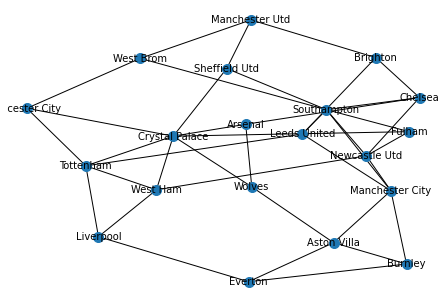

In [32]:

# importing networkx
import networkx as nx
# importing matplotlib.pyplot
import matplotlib.pyplot as plt
 
g = nx.Graph()
for t in range(20):
    for h in [-2,-4,-6]:
        g.add_edge(names[t], names[dicti[lists[t][h]]-1])
nx.draw(g, with_labels = True,node_size = 100,font_size = 10)
plt.savefig("clubs.png")

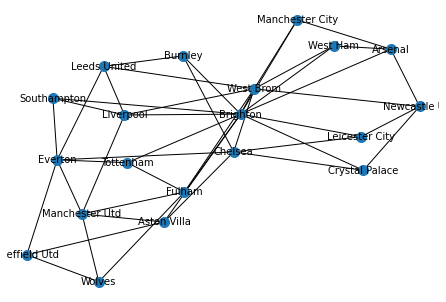

In [31]:
f = nx.Graph()
for t in range(20):
    for h in [-2,-4,-6]:
        f.add_edge(names[t], names[dicti[lists2[t][h]]-1])
nx.draw(f, with_labels = True,node_size = 100,font_size = 10)
plt.savefig("clubs2.png")